# Retina Blood Vessel Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

import sys

import os
from os.path import join
from glob import glob
from natsort import natsorted

import numpy as np

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


PROJECT_DIR=os.getcwd()

DATA_PATH="/Users/saidharb/Documents/LocalDocuments/Studienarbeit/Retina_Dataset"

In [17]:
x_train=glob(join(DATA_PATH,'train', "image", "*.png"), recursive=True)
x_train = np.array(natsorted(x_train, key=lambda y: y.lower()))

y_train=glob(join(DATA_PATH,'train', "mask", "*.png"), recursive=True)
y_train = np.array(natsorted(y_train, key=lambda y: y.lower()))

x_test=glob(join(DATA_PATH,'test', "image", "*.png"), recursive=True)
x_test=np.array(natsorted(x_test, key=lambda y: y.lower()))

y_test=glob(join(DATA_PATH,'test', "mask", "*.png"), recursive=True)
y_test=np.array(natsorted(y_test, key=lambda y: y.lower()))

In [96]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self,
                 path_images,
                 path_labels,
                 batch_size,
                 n_classes,
                 target_size,
                 shuffle=True):
        self.path_images = path_images
        self.path_labels = path_labels
        self.batch_size = batch_size
        self.n_classes = n_classes
        self.target_size=target_size
        self.shuffle= shuffle

    def on_epoch_end(self):
        if self.shuffle:
            self.path_images, self.path_labels = shuffle(self.path_images, self.labels)

    def __len__(self):
        return np.ceil(self.path_images.shape[0]/self.batch_size).astype("int")

    def __get_image(self, path_image):
        x_sample = cv2.imread(path_image)
        x_sample = cv2.resize(x_sample, (self.target_size, self.target_size))
        x_sample = x_sample.astype(np.float32) / 255.0
        x_sample = np.expand_dims(x_sample, axis=0)
        return x_sample

    def __get_label(self, path_label):
        y_sample = cv2.imread(path_label, cv2.IMREAD_GRAYSCALE)
        y_sample = cv2.resize(y_sample, (self.target_size, self.target_size))
        y_sample=np.expand_dims(y_sample, axis=-1)
        #y_sample = y_sample.astype(np.float32) / 255.0
        y_sample = np.expand_dims(y_sample, axis=0)
        return y_sample

    def print_image(self, path_image):
        img = mpimg.imread(path_image)
        plt.imshow(img)
        plt.axis('off') 
        plt.show()

    def print_label(self, path_label):
        lbl=mpimg.imread(path_label)
        plt.imshow(lbl, cmap='gray')
        plt.axis('off')
        plt.show()

    def get_unique_image_sizes(self):
        unique_sizes = set()
        for path in self.path_images:
            img = mpimg.imread(path)
            size = img.shape[:2]
            unique_sizes.add(size)
        return unique_sizes
    
    def print_image_label_pair(self, path_image, path_label):
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        img = mpimg.imread(path_image)
        axes[0].imshow(img)
        axes[0].axis('off')
        axes[0].set_title('Image')
        lbl = mpimg.imread(path_label)
        axes[1].imshow(lbl, cmap='gray')
        axes[1].axis('off')
        axes[1].set_title('Label')
        plt.show()

    def __getitem__(self, idx):
        
        i = idx * self.batch_size
        current_batch_size = min(self.batch_size, len(self.path_images) - i)
        
        batch_images = self.path_images[i : i + current_batch_size]
        batch_labels = self.path_labels[i : i + current_batch_size]
        
        x = np.zeros((current_batch_size,
                  self.target_size,
                  self.target_size,
                  3),
                  dtype=np.float32)
        y = np.zeros((current_batch_size,
                  self.target_size,
                  self.target_size,
                  1),
                  dtype=np.float32)
        
        for j, (path_image,label) in enumerate(zip(batch_images,batch_labels)):
            x_sample = self.__get_image(path_image)
            y_sample = self.__get_label(label)
        
            x[j,...] = x_sample
            y[j,...] = y_sample
        
        return x, y

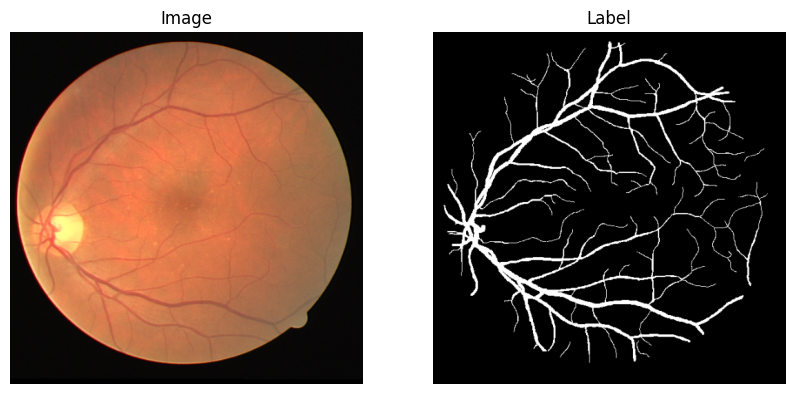

Unique sizes of images and labels: {(512, 512)}
Batch #    Images               Labels      
0          (4, 512, 512, 3)     (4, 512, 512, 1)
1          (4, 512, 512, 3)     (4, 512, 512, 1)
2          (4, 512, 512, 3)     (4, 512, 512, 1)
3          (4, 512, 512, 3)     (4, 512, 512, 1)
4          (4, 512, 512, 3)     (4, 512, 512, 1)


In [106]:
data_gen_train = DataGenerator(path_images=x_test,
                               path_labels=y_test,
                               batch_size=4,
                               n_classes=2,
                               target_size=512,
                               shuffle=True)
index=2
image=x_train[index]
target=y_train[index]

data_gen_train.print_image_label_pair(image, target)
print("Unique sizes of images and labels: {}".format(data_gen_train.get_unique_image_sizes()))

print("{:<10} {:<20} {:<12}".format("Batch #", 'Images', 'Labels'))
for i, (x, y) in enumerate(data_gen_train):
    print("{:<10} {:<20} {:<12}".format(i, str(x.shape), str(y.shape)))